In [2]:
import pickle
import json
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm  # For finding the Times New Roman font


### dcm eval

In [35]:
head_groups_mapping = {
    "direct_logit_heads": "value",
    "heads_affect_direct_logit": "position",
    "heads_at_query_box_pos": "duplicate",
    "heads_at_prev_query_box_pos": "content",
}

In [55]:
results_mean = {"llama": {}, "vicuna": {}, "goat": {}}
results_std = {"llama": {}, "vicuna": {}, "goat": {}}

for model_name in results_mean.keys():
    with open(f"../Anima-2.0/{model_name}_semantic_results.json") as f:
        data = json.load(f)
    data = data[model_name]

    for head_group in data.keys():
        box_label_value_mean = round(np.mean(data[head_group]["box_label_value"]) / 100, 2)
        object_value_mean = round(np.mean(data[head_group]["object_value"]) / 100, 2)
        positional_mean = round(np.mean(data[head_group]["positional"]) / 100, 2)

        box_label_value_std = round(np.std(data[head_group]["box_label_value"]) / 100, 2)
        object_value_std = round(np.std(data[head_group]["object_value"]) / 100, 2)
        positional_std = round(np.std(data[head_group]["positional"]) / 100, 2)

        results_mean[model_name][head_groups_mapping[head_group]] = [
            box_label_value_mean,
            object_value_mean,
            positional_mean,
        ]
        results_std[model_name][head_groups_mapping[head_group]] = [
            box_label_value_std,
            object_value_std,
            positional_std,
        ]

In [62]:
llama_mean = [
    results_mean["llama"]["content"],
    results_mean["llama"]["duplicate"],
    results_mean["llama"]["position"],
    results_mean["llama"]["value"],
]
goat_mean = [
    results_mean["goat"]["content"],
    results_mean["goat"]["duplicate"],
    results_mean["goat"]["position"],
    results_mean["goat"]["value"],
]
vicuna_mean = [
    results_mean["vicuna"]["content"],
    results_mean["vicuna"]["duplicate"],
    results_mean["vicuna"]["position"],
    results_mean["vicuna"]["value"],
]

In [63]:
llama_std = [
    results_std["llama"]["content"],
    results_std["llama"]["duplicate"],
    results_std["llama"]["position"],
    results_std["llama"]["value"],
]
goat_std = [
    results_std["goat"]["content"],
    results_std["goat"]["duplicate"],
    results_std["goat"]["position"],
    results_std["goat"]["value"],
]
vicuna_std = [
    results_std["vicuna"]["content"],
    results_std["vicuna"]["duplicate"],
    results_std["vicuna"]["position"],
    results_std["vicuna"]["value"],
]

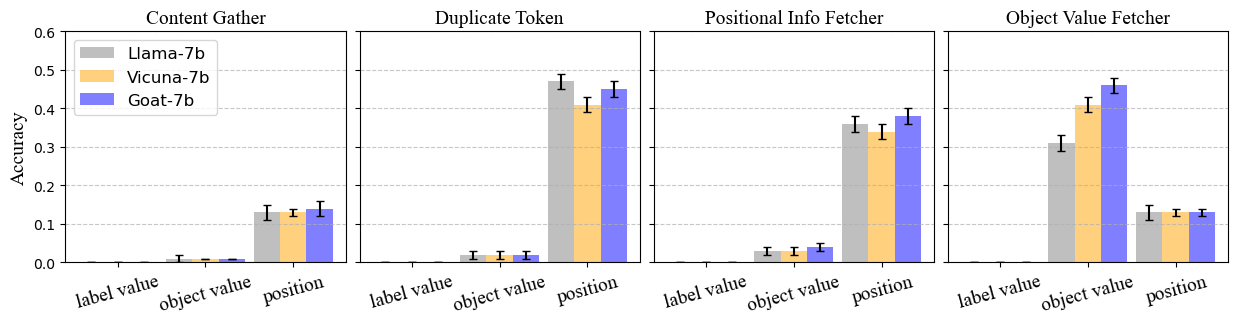

In [68]:
# set width ofbar
barWidth = 0.3
num_figs = 4

desiderata = ["label value", "object value", "position"]
groups = ["Content Gather", "Duplicate Token", "Positional Info Fetcher", "Object Value Fetcher"]
fig, axs = plt.subplots(1, num_figs, figsize=(15, 3))
plt.subplots_adjust(hspace=0.05, wspace=0.05)

font_properties = {"family": "Times New Roman", "size": 14}

for i in range(len(groups)):
    llama_val = llama_mean[i]
    goat_val = goat_mean[i]
    vicuna_val = vicuna_mean[i]

    # Set position of bar on X axis
    br1 = np.arange(len(llama_val))
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]

    # Make the plot
    axs[i].bar(br1, llama_val, color="grey", alpha=0.5, width=barWidth, label="Llama-7b")
    axs[i].bar(br2, vicuna_val, color="orange", alpha=0.5, width=barWidth, label="Vicuna-7b")
    axs[i].bar(br3, goat_val, color="blue", alpha=0.5, width=barWidth, label="Goat-7b")

    # Add error bars
    axs[i].errorbar(
        br1,
        llama_val,
        yerr=llama_std[i],
        fmt="none",
        ecolor="black",
        capsize=3,
    )
    axs[i].errorbar(
        br2,
        vicuna_val,
        yerr=vicuna_std[i],
        fmt="none",
        ecolor="black",
        capsize=3,
    )
    axs[i].errorbar(
        br3,
        goat_val,
        yerr=goat_std[i],
        fmt="none",
        ecolor="black",
        capsize=3,
    )

    # Adding Xticks
    axs[i].set_xticks([r + barWidth for r in br1])  # Set the tick positions
    axs[i].set_xticklabels(desiderata, font_properties=font_properties)  # Set the tick labels
    axs[i].tick_params(axis="x", labelrotation=15)
    #     axs[i].grid(axis='y')
    axs[i].set_ylim(0, 0.6)
    axs[i].set_title(groups[i], font_properties=font_properties)

    if i == 0:
        axs[i].set_ylabel("Accuracy", font_properties=font_properties)
        #     if i==3:
        axs[i].legend(fontsize=12, ncol=1, loc="upper left")
        axs[i].grid(True, axis="y", linestyle="--", alpha=0.7)

    else:
        axs[i].grid(True, axis="y", linestyle="--", alpha=0.7)
        #         axs[i].set_yticks([    ])
        tick_positions = axs[i].get_yticks()
        tick_labels = axs[i].get_yticklabels()

        # Set the tick positions and empty labels
        axs[i].set_yticks(tick_positions)
        axs[i].set_yticklabels([""] * len(tick_labels))  # Set empty labels

plt.savefig("Figures/semantic.pdf", bbox_inches="tight", dpi=200)

### CMAP

In [5]:
head_gropus = [
    "Content Gather",
    "Duplicate Token",
    "Positional Info",
    "Object Value",
    "Positional Info +\nObject Value",
    "Full Circuit",
]
cmap_heads = [0.66, 0.60, 0.69, 0.74, 0.76, 0.75]
llama_full = 0.66
goat_full = 0.82

inputs_pos = [
    "Final Query",
    "Keys",
    "Values",
    "Keys, Final Query",
    "Keys, Final Query,\nQuery Box Label val.",
    "Keys, Final Query,\nAll values",
]
cmap_pos = [0.65, 0.61, 0.71, 0.61, 0.65, 0.7]

inputs_val = [
    "Final Query",
    "Keys",
    "Values",
    "Keys, Final Query",
    "Keys, Final Query,\nCorrect object val.",
    "Keys, Final Query,\nAll values",
]
cmap_val = [0.74, 0.65, 0.68, 0.74, 0.74, 0.75]

/tmp/ipykernel_194933/2128562550.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_yticklabels([""] * len(tick_labels))  # Set empty labels


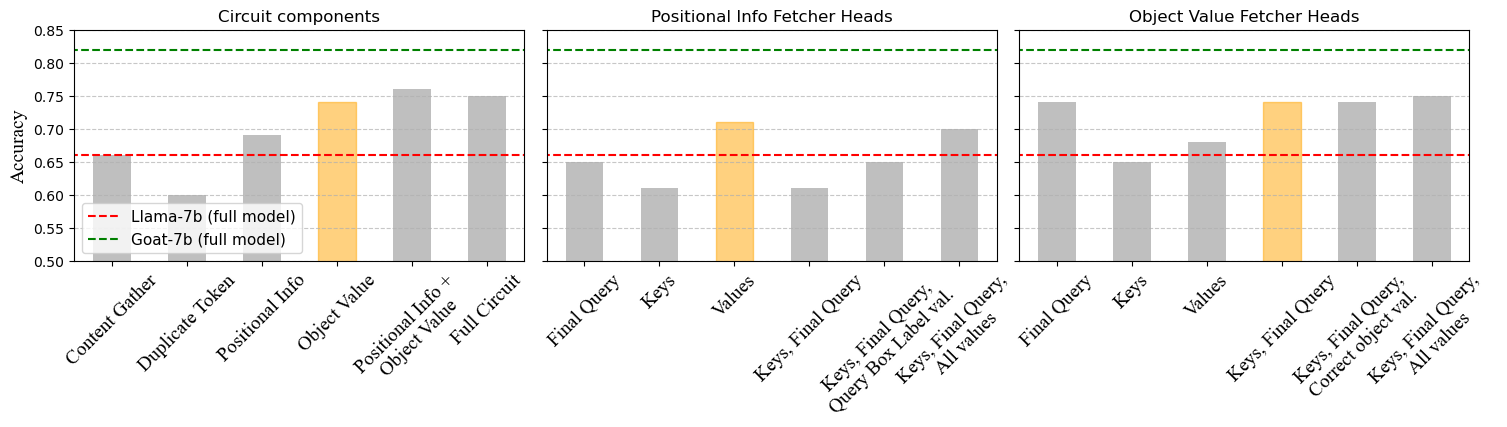

In [6]:
titles = ["Circuit components", "Positional Info Fetcher Heads", "Object Value Fetcher Heads"]
values = [cmap_heads, cmap_pos, cmap_val]
barWidth = 0.5
num_figs = len(titles)
labels = [head_gropus, inputs_pos, inputs_val]
fig, axs = plt.subplots(1, num_figs, figsize=(18, 3))
plt.subplots_adjust(hspace=0.05, wspace=0.05)

font_properties = {"family": "Times New Roman", "size": 14}

for i in range(num_figs):
    val = values[i]
    br1 = np.arange(len(val))
    # Make the plot
    axs[i].plot(
        range(-1, len(val) + 1),
        llama_full * np.ones(len(val) + 2),
        "--",
        color="red",
        alpha=1,
        label="Llama-7b (full model)",
    )
    axs[i].plot(
        range(-1, len(val) + 1),
        goat_full * np.ones(len(val) + 2),
        "--",
        color="green",
        alpha=1,
        label="Goat-7b (full model)",
    )
    axs[i].bar(br1, val, color="grey", alpha=0.5, width=barWidth, label=titles[i])
    if i == 1:
        axs[i].get_children()[2 + 2].set_color("orange")
    else:
        axs[i].get_children()[2 + 3].set_color("orange")

    # Adding Xticks
    axs[i].set_xticks(br1)  # Set the tick positions
    axs[i].set_xticklabels(labels[i], font_properties=font_properties)  # Set the tick labels
    axs[i].tick_params(axis="x", labelrotation=45)
    axs[i].set_xlim(-0.5, 5.5)
    axs[i].set_ylim(0.5, 0.85)
    axs[i].set_title(titles[i])

    if i == 0:
        axs[i].set_ylim(0.5, 0.85)
        axs[i].set_ylabel("Accuracy", font_properties=font_properties)
        axs[i].grid(True, axis="y", linestyle="--", alpha=0.7)
        #     if i==3:
        #         axs[i].legend(fontsize = 12, ncol=2, frameon=False, loc='upper left')
        axs[i].legend(
            fontsize=11,
            handles=[axs[i].lines[0], axs[i].lines[1]],
            labels=["Llama-7b (full model)", "Goat-7b (full model)"],
        )
    else:
        axs[i].set_ylim(0.5, 0.85)
        axs[i].grid(True, axis="y", linestyle="--", alpha=0.7)
        #         tick_positions = axs[i].get_yticks()
        tick_labels = axs[i].get_yticklabels()

        # Set the tick positions and empty labels
        #         axs[i].set_yticks(tick_positions)
        axs[i].set_yticklabels([""] * len(tick_labels))  # Set empty labels

# plt.show()
plt.savefig("Figures/CMAP_results.pdf", bbox_inches="tight", dpi=200)

In [26]:
axs[i].get_children()[3]